In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def displayMatrixCorr(df, val_manquante = None):
    # Filtrer les colonnes ayant moins de 400 valeurs manquantes
    if val_manquante == None :
        corr_matrix = df.corr()
    else :
        filtered_df = df.loc[:, df.isnull().sum() < val_manquante]
    
        # Calculer la matrice de corrélation
        corr_matrix = filtered_df.corr()
    
    # Afficher la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Matrice de corrélation")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def displayMissingValues(df) :
        # Calculer le nombre de valeurs manquantes par colonne
    missing_values = df.isnull().sum()

    # Créer l'histogramme
    plt.figure(figsize=(10,6))
    bars = plt.bar(missing_values.index, missing_values.values)

    # Ajouter les valeurs exactes au-dessus de chaque barre
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=5)

    # Rotation des labels de l'axe des x
    plt.xticks(rotation=45, ha='right', fontsize=6)

    # Ajouter un titre et labels des axes
    plt.title(f'Nombre de valeurs manquantes par colonne, nbreligne = {df.shape[0]}')
    plt.ylabel('Nombre de valeurs manquantes')

    # Afficher le graphique
    plt.tight_layout()  # Pour éviter que les labels soient coupés
    plt.show()

    return None

df_raw = pd.read_csv("weld_data_raw.csv")
#print('Valeur unique de la colone "Type of weld" from df_raw : ', df_raw['Type of weld'].unique())

# Charger le fichier CSV
df = pd.read_csv("weld_data.csv")
df = df.replace(-1, np.nan)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1652 non-null   object 
 4   Phosphorus concentration (weight%)            1652 non-null   object 
 5   Nickel concentration (weight%)                1652 non-null   object 
 6   Chromium concentration (weight%)              1652 non-null   object 
 7   Molybdenum concentration (weight%)            1652 non-null   object 
 8   Vanadium concentration (weight%)              1652 non-null   object 
 9   Copper concentration (weight%)                1652 non-null   o

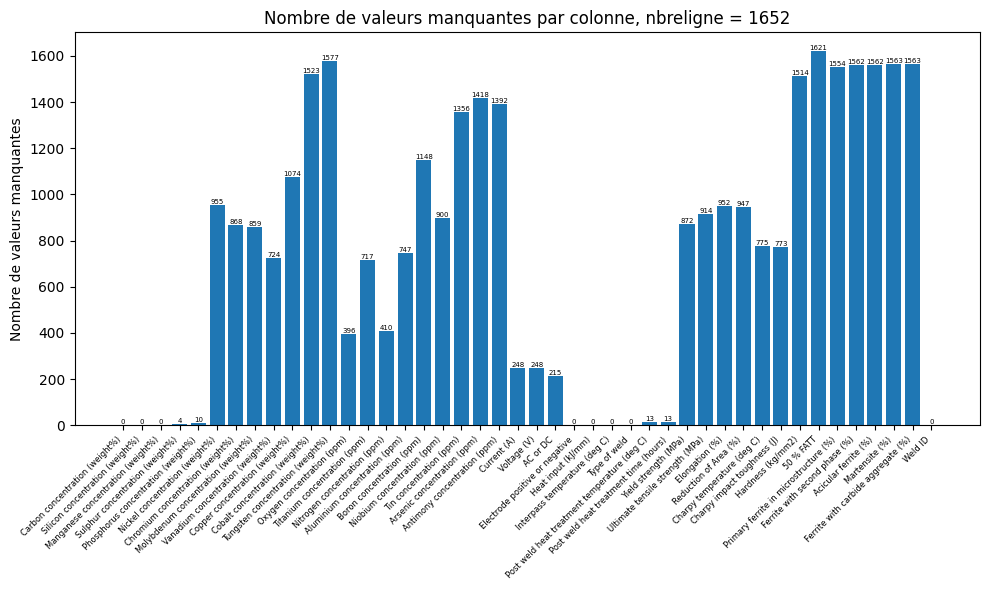

In [9]:
displayMissingValues(df)

In [4]:
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()  # Obtenir les valeurs uniques de la colonne
        count_N = df[column].value_counts().get('N', 0)
        print(f"Colonne '{column}' : {len(unique_values)} valeurs uniques et {count_N} valeurs manquantes")
        print(unique_values)
        print('-' * 50)

display_unique_values(df_raw)

Colonne 'Carbon concentration (weight%)' : 81 valeurs uniques et 0 valeurs manquantes
[0.037  0.044  0.045  0.039  0.041  0.051  0.049  0.038  0.043  0.053
 0.046  0.048  0.074  0.075  0.076  0.068  0.081  0.079  0.078  0.069
 0.08   0.071  0.072  0.066  0.067  0.09   0.088  0.091  0.089  0.094
 0.086  0.04   0.047  0.052  0.05   0.054  0.073  0.077  0.07   0.062
 0.06   0.055  0.059  0.042  0.058  0.065  0.095  0.151  0.147  0.145
 0.061  0.035  0.1    0.12   0.099  0.093  0.101  0.096  0.097  0.03
 0.032  0.031  0.098  0.13   0.11   0.057  0.15   0.064  0.082  0.036
 0.125  0.105  0.115  0.1055 0.14   0.16   0.084  0.092  0.029  0.063
 0.18  ]
--------------------------------------------------
Colonne 'Silicon concentration (weight%)' : 68 valeurs uniques et 0 valeurs manquantes
[0.3   0.31  0.35  0.33  0.32  0.36  0.29  0.34  0.39  0.44  0.48  0.37
 0.51  0.57  0.27  0.45  0.24  0.41  0.46  0.43  0.42  0.52  0.54  0.18
 0.17  0.2   0.22  0.4   0.26  0.25  0.53  0.38  0.28  0.47  0.2

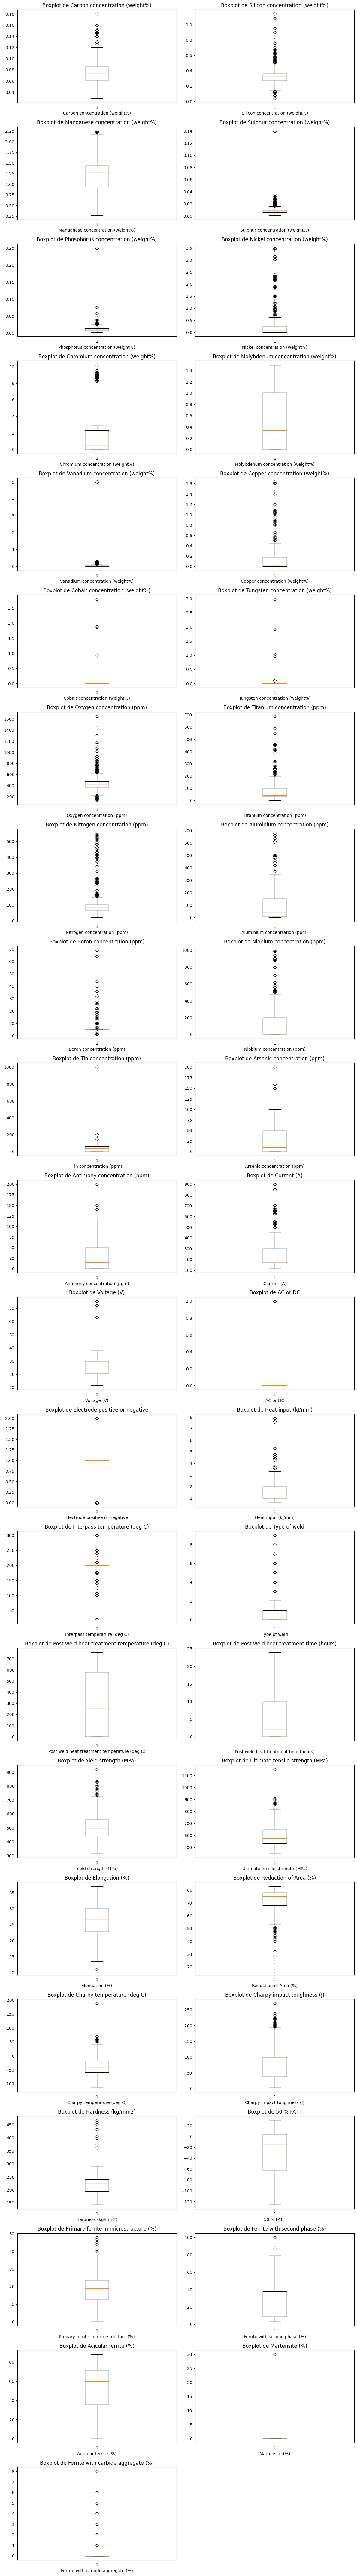

In [14]:
def display_boxplots_no_nan(df):
    # Compteur pour savoir combien de boxplots ont été affichés
    plot_count = 0
    # Création d'une figure avec 2 sous-graphes par ligne (1 ligne, 2 colonnes)
    fig, axes = plt.subplots(nrows=(len(df.columns) + 1) // 2, ncols=2, figsize=(12, len(df.columns) * 2))
    
    # Aplatir les axes (au cas où il y ait plusieurs lignes de sous-graphiques)
    axes = axes.flatten()
    
    # Parcourir chaque colonne du dataframe
    for col in df.columns:
        # Retirer les valeurs NaN de la colonne
        non_nan_values = df[col].dropna()
        
        # Vérifier s'il reste des valeurs après avoir retiré les NaN
        if not non_nan_values.empty:
            # Créer un boxplot pour la colonne dans l'axe correspondant
            axes[plot_count].boxplot(non_nan_values)
            
            # Titre du boxplot correspondant à la colonne
            axes[plot_count].set_title(f"Boxplot de {col}")
            axes[plot_count].set_xlabel(col)
            
            # Incrémenter le compteur de boxplots
            plot_count += 1
    
    # Supprimer les sous-graphiques inutilisés (s'il y en a)
    for i in range(plot_count, len(axes)):
        fig.delaxes(axes[i])
    
    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()
    plt.show()
df_without_ID = df.iloc[:, :-1]
display_boxplots_no_nan(df_without_ID)

1652
Nbre avant remove : 784 
Nbre après remove : 664 

Nbre avant remove : 484 
Nbre après remove : 401 

Nbre avant remove : 401 
Nbre après remove : 340 

340


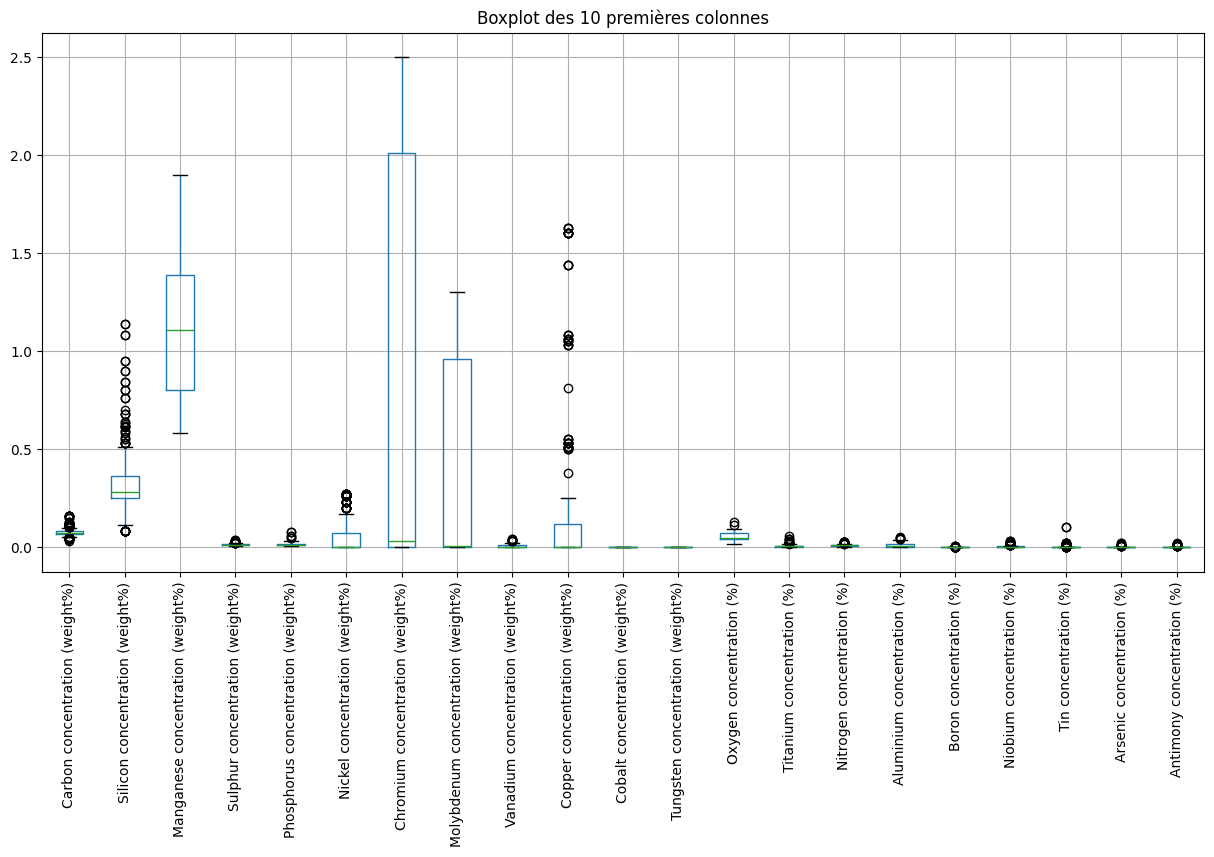

In [42]:
def modify_columns_ppm(df):
    # Parcourir toutes les colonnes du dataframe
    for col in df.columns:
        # Vérifier si "ppm" est présent dans le nom de la colonne et si la colonne n'est pas de type 'object'
        if "ppm" in col and df[col].dtype != object:
            # Diviser les valeurs par 10 000
            df[col] = df[col] / 10000
            
            # Modifier le nom de la colonne, remplacer "ppm" par "%"
            new_col_name = col.replace("ppm", "%")
            df.rename(columns={col: new_col_name}, inplace=True)
            
    return df

def remove_outliers_column(df, column):
    # Créer une copie du DataFrame pour ne pas modifier l'original
    df_clean = df.copy()
    
    # Calculer les quartiles Q1 et Q3 pour la colonne spécifiée
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    
    # Calculer l'IQR (interquartile range)
    IQR = Q3 - Q1
    
    # Définir les bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les valeurs qui ne sont pas des outliers dans la colonne spécifiée
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

df_same_unit = modify_columns_ppm(df)

first_21_cols = df.iloc[:, :21]
print(first_21_cols.shape[0])
#L = ["Chromium concentration (weight%)"]
L = ["Chromium concentration (weight%)", "Vanadium concentration (weight%)", "Nickel concentration (weight%)"]
for col in L :
    print(f"Nbre avant remove : {first_21_cols[col].count()} ")
    first_21_cols = remove_outliers_column(first_21_cols, col)
    print(f"Nbre après remove : {first_21_cols[col].count()} \n")

print(first_21_cols.shape[0])

plt.figure(figsize=(15, 7))
    
# Créer le boxplot
first_21_cols.boxplot()

# Ajouter un titre
plt.title('Boxplot des 10 premières colonnes')

# Rotation des labels de l'axe des x
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

222


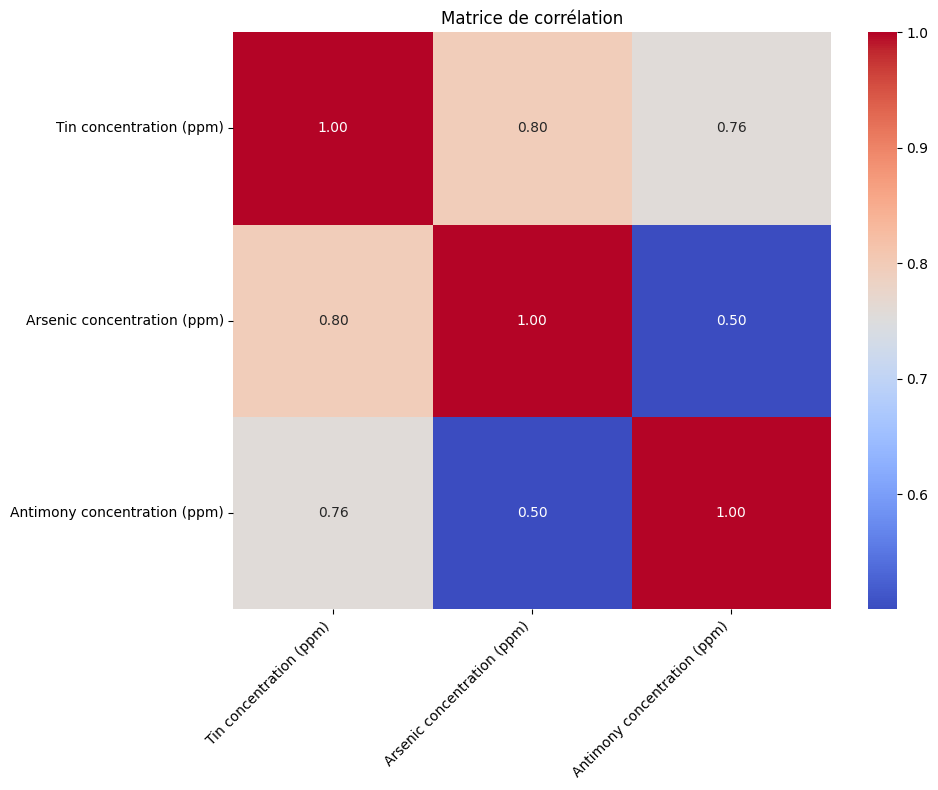

In [17]:
df_without_ID = df.iloc[:, :-1]
df_new = df_without_ID.iloc[:, :9]
df_cleaned = df_new.dropna()

df_cleaned1 = df[['Tin concentration (ppm)','Arsenic concentration (ppm)','Antimony concentration (ppm)']].dropna()
print(df_cleaned1.shape[0])
displayMatrixCorr(df_cleaned1)

<Axes: xlabel='Phosphorus concentration (weight%)', ylabel='Sulphur concentration (weight%)'>

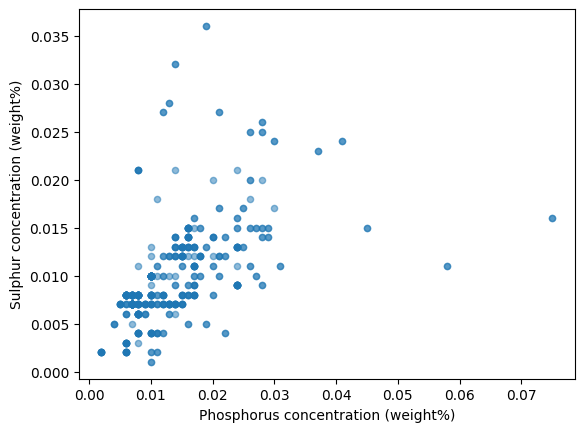

In [35]:
df_without_ID = df.iloc[:, :-1]
df_new = df_without_ID.iloc[:, :9]
df_cleaned = df_new.dropna()
df_cleaned_bis = df_cleaned[df_cleaned['Phosphorus concentration (weight%)'] <= 0.10]
df_cleaned_bis.plot(kind="scatter", x="Phosphorus concentration (weight%)", y="Sulphur concentration (weight%)",
             alpha=0.5)

count    129.000000
mean       0.071023
std        0.353735
min        0.000000
25%        0.000000
50%        0.005000
75%        0.010000
max        2.800000
Name: Cobalt concentration (weight%), dtype: float64


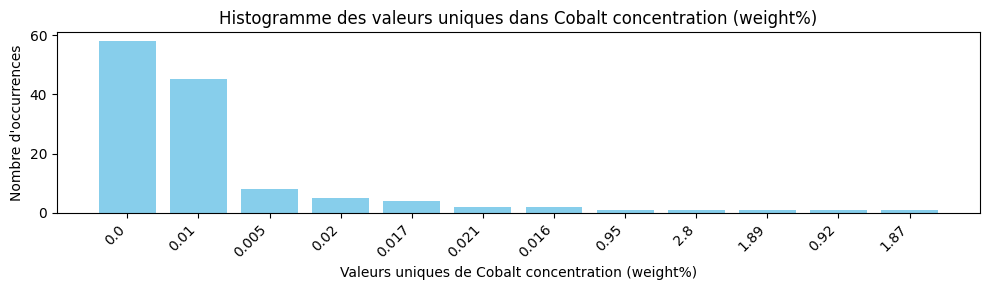

count    75.000000
mean      0.134267
std       0.454958
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.990000
Name: Tungsten concentration (weight%), dtype: float64


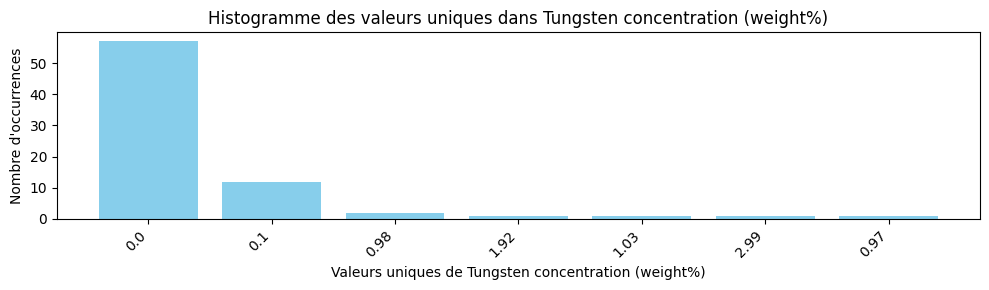

count     296.000000
mean       42.170986
std        89.075058
min         0.000000
25%         0.008000
50%        40.000000
75%        60.000000
max      1000.000000
Name: Tin concentration (ppm), dtype: float64


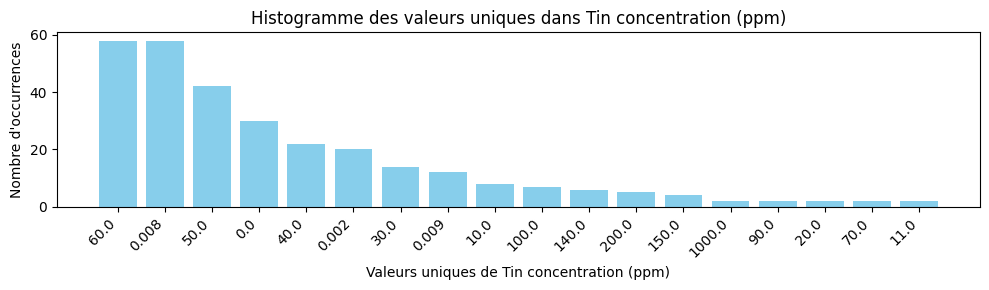

count    234.000000
mean      31.044726
std       43.003026
min        0.003000
25%        0.030500
50%       10.000000
75%       50.000000
max      200.000000
Name: Arsenic concentration (ppm), dtype: float64


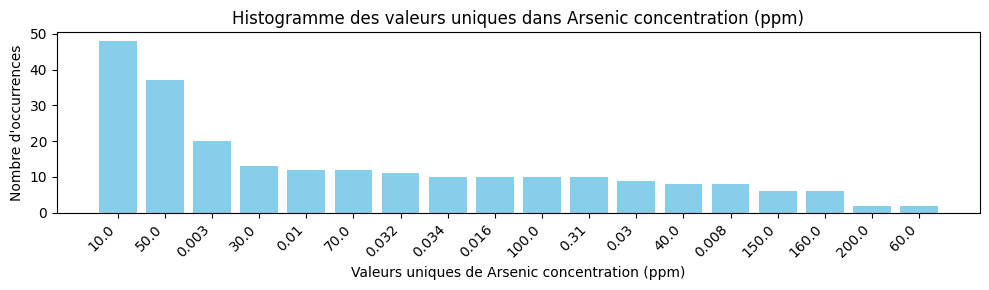

count    260.000000
mean      29.456077
std       36.782796
min        0.000000
25%        0.008000
50%       15.000000
75%       50.000000
max      200.000000
Name: Antimony concentration (ppm), dtype: float64


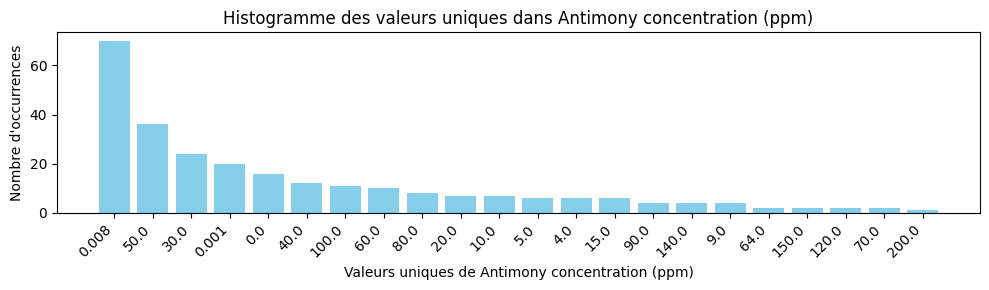

count    1404.000000
mean      283.843661
std       192.560955
min       115.000000
25%       170.000000
50%       170.000000
75%       300.000000
max       900.000000
Name: Current (A), dtype: float64


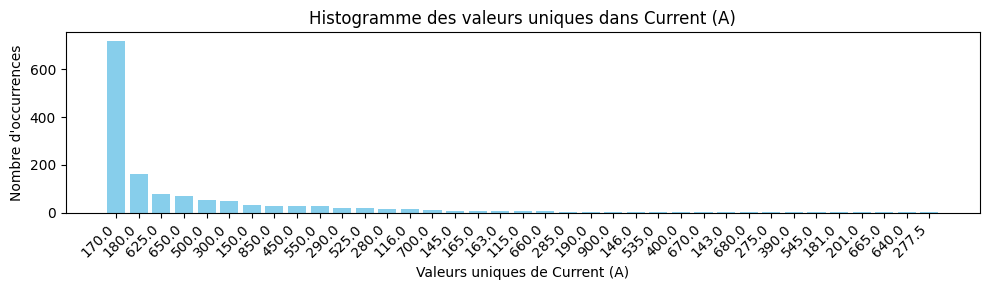

In [16]:
def plot_unique_value_histograms(df):
    # Parcourir chaque colonne du DataFrame
    for col in df.columns:
        # Compter le nombre d'occurrences des valeurs uniques dans la colonne
        unique_counts = df[col].value_counts()
        print(df[col].describe())

        # Créer un histogramme
        plt.figure(figsize=(10, 3))
        plt.bar(unique_counts.index.astype(str), unique_counts.values, color='skyblue')

        # Ajouter des étiquettes sur les axes et un titre
        plt.xlabel(f'Valeurs uniques de {col}')
        plt.ylabel('Nombre d\'occurrences')
        plt.title(f'Histogramme des valeurs uniques dans {col}')

        # Rotation des labels pour l'axe des x (au cas où il y a beaucoup de valeurs)
        plt.xticks(rotation=45, ha='right')

        # Afficher le graphique
        plt.tight_layout()
        plt.show()
df_end = df.iloc[:, 10:12]
plot_unique_value_histograms(df_end)
plot_unique_value_histograms(df.iloc[:,18:22])


In [ ]:
columnToDelete = ["Ferrite with carbide aggregate (%)","Martensite (%)" , "Cobalt concentration (weight%)", "Tungsten concentration (weight%)"]

## stochastic regression imputation

Carbon concentration (weight%)          0
Silicon concentration (weight%)         0
Manganese concentration (weight%)       0
Sulphur concentration (weight%)         4
Phosphorus concentration (weight%)     10
Nickel concentration (weight%)        955
Chromium concentration (weight%)      868
Molybdenum concentration (weight%)    859
Vanadium concentration (weight%)      724
dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
1652


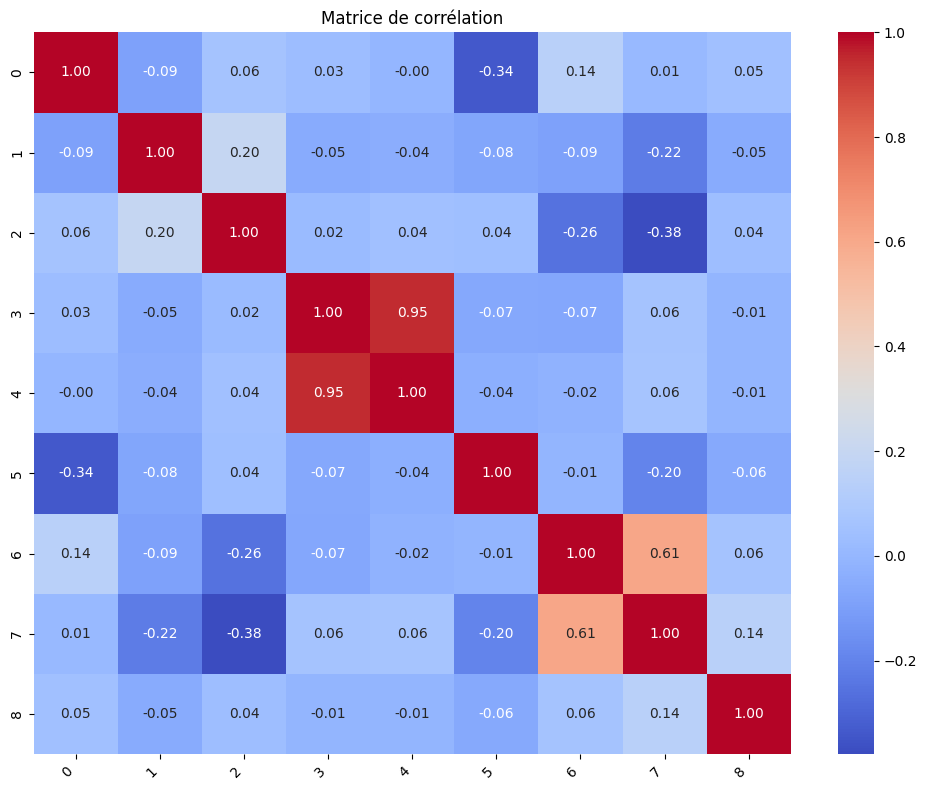

In [27]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
df_sti = df.iloc[:, :9]
print(df_sti.isnull().sum())

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_sti)
df_it_imp = pd.DataFrame(X_it_imp)

print(df_it_imp.isnull().sum())
print(df_it_imp.shape[0])
displayMatrixCorr(df_it_imp)

## Univariate

Carbon concentration (weight%)          0
Silicon concentration (weight%)         0
Manganese concentration (weight%)       0
Sulphur concentration (weight%)         4
Phosphorus concentration (weight%)     10
Nickel concentration (weight%)        955
Chromium concentration (weight%)      868
Molybdenum concentration (weight%)    859
Vanadium concentration (weight%)      724
dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
1652


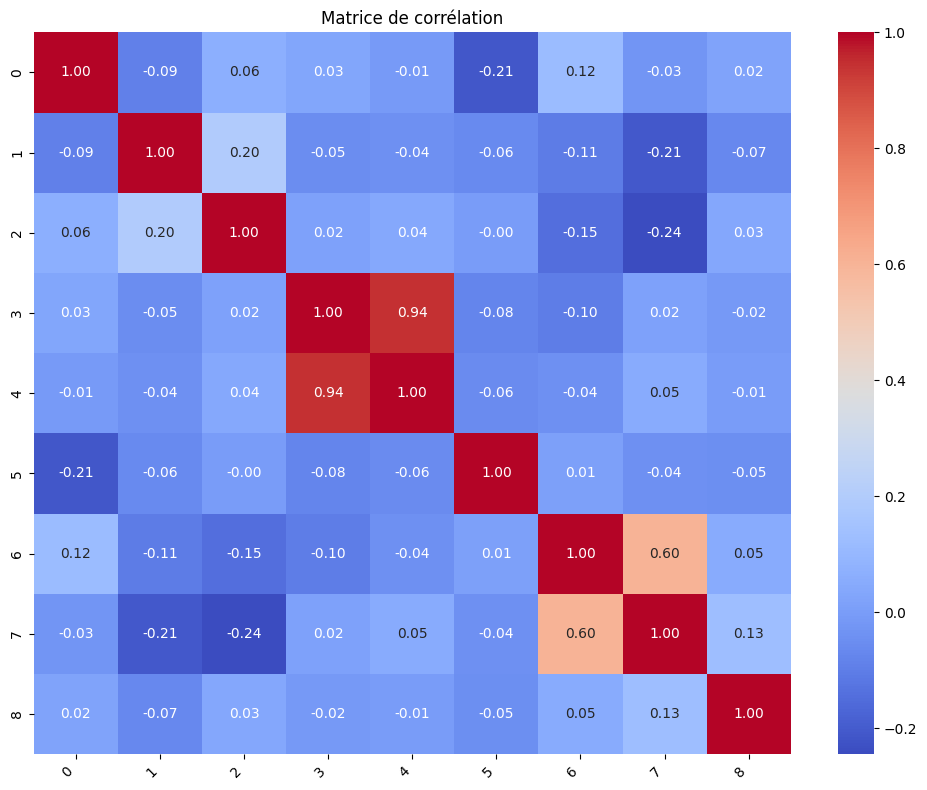

In [29]:
from sklearn.impute import SimpleImputer
df_sti = df.iloc[:, :9]
print(df_sti.isnull().sum())
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='mean')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(df_sti)

df_it_imp = pd.DataFrame(X_mean)

print(df_it_imp.isnull().sum())
print(df_it_imp.shape[0])
displayMatrixCorr(df_it_imp)